In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Problem Statment

Predict the premium charges  for medical insurance

# 2. Data Gathering

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


# 3. Exploratory Data Analysis (EDA)


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1. age

In [6]:
df["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [7]:
df['age'].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

### 2. Sex

In [8]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df['sex'].replace({'female':0,'male':1},inplace=True)

### 3. BMI

In [11]:
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

### 4. Children

In [12]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### 5. Smoker

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
df['smoker'].replace({'no':1,'yes':0},inplace=True)

### 6. Region

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
df['region'].replace({'southeast':1,'southwest':2, 'northwest':3,'northeast':4},inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


# 4. Feature selection

In [18]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,0.001205,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,0.038873,-0.787251
region,0.006308,-0.012816,-0.262754,0.001205,0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,-0.039473,1.000000


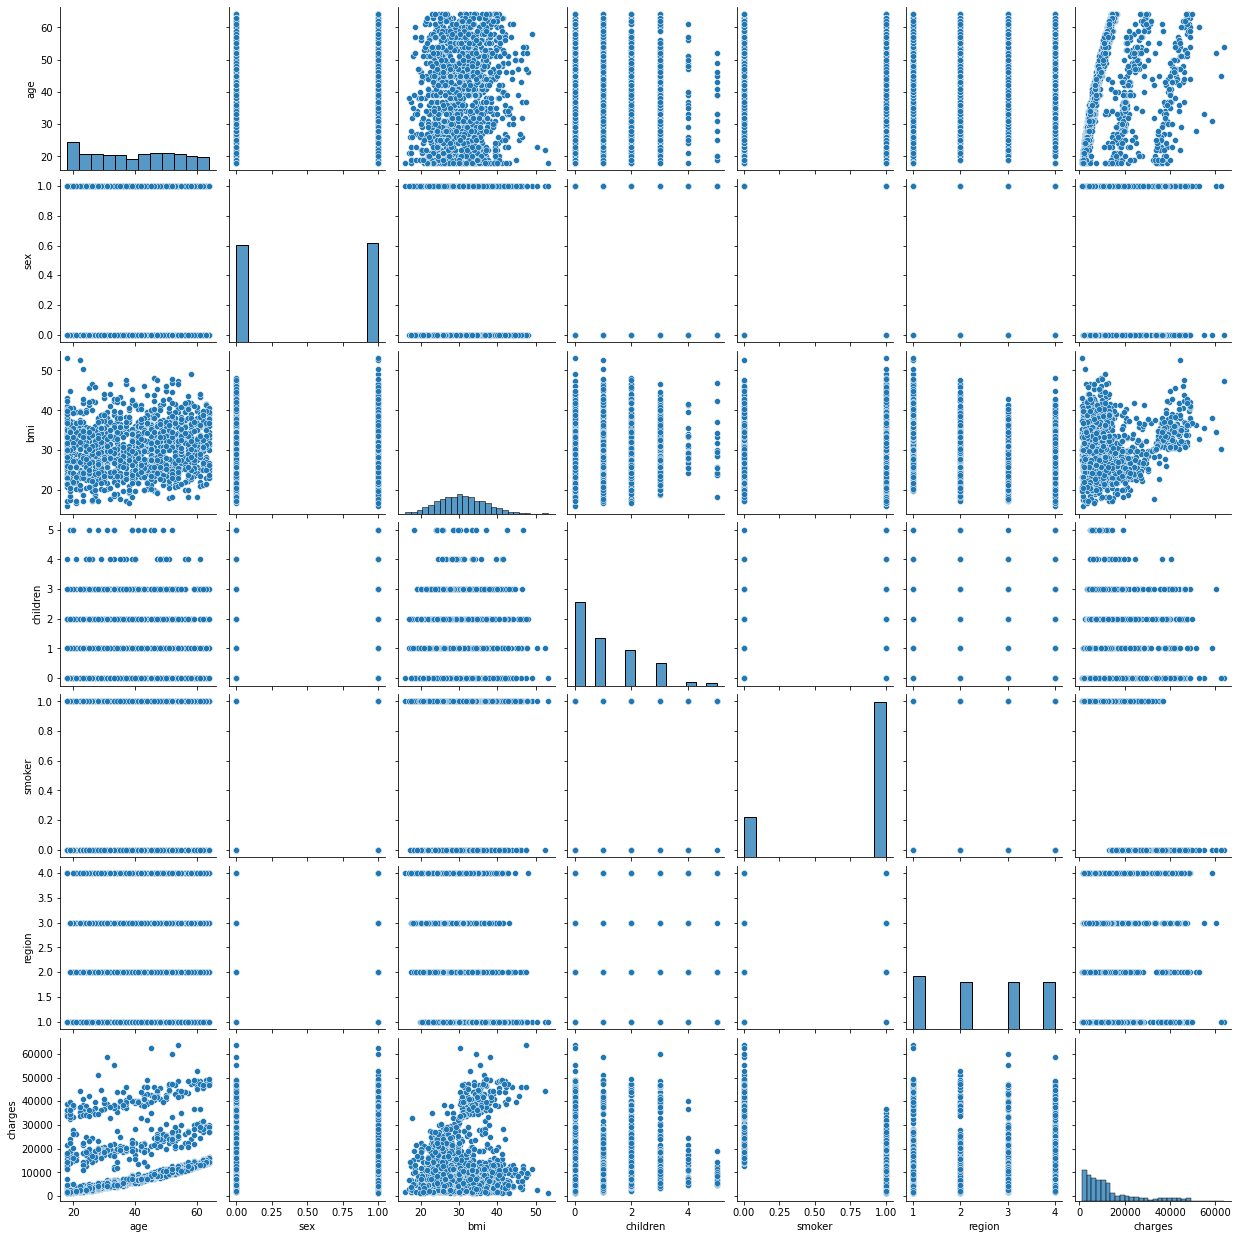

In [19]:
sns.pairplot(df)

<AxesSubplot:>

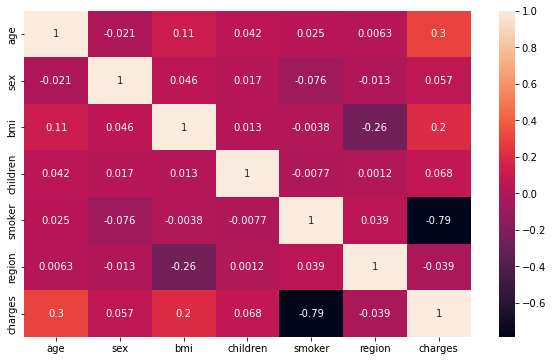

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Test Train Split

In [21]:
x = df.drop('charges',axis=1)
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [22]:
x.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [23]:
x_train

,age,sex,bmi,children,smoker,region
737,26,1,23.700,2,1,2
369,18,1,30.400,3,1,4
284,52,0,31.200,0,1,2
1302,25,0,20.800,1,1,2
958,43,1,34.960,1,0,4
...,...,...,...,...,...,...
1330,57,0,25.740,2,1,1
1016,19,0,24.605,1,1,3
165,47,1,28.215,4,1,4
7,37,0,27.740,3,1,3


# 6. Model Training

In [24]:
model = LinearRegression()
model.fit(x_train.values,y_train.values)

LinearRegression()

In [25]:
#Testing data Evaluation 

y_pred = model.predict(x_test.values)

mse = mean_squared_error(y_test.values,y_pred)
print("MSE is : ",mse)

rmse = np.sqrt(mse)
print("RMSE is : ",rmse)

mae = mean_absolute_error(y_test.values,y_pred)
print("MAE is : ",mae)

r2 = r2_score(y_test.values,y_pred)
print("R2 score is : ",r2)

MSE is :  39683206.56643288
RMSE is :  6299.460815532777
MAE is :  4349.275182969114
R2 score is :  0.7345508690292144


In [26]:
# Traing Data Evaluation

y_pred_train = model.predict(x_train.values)

mse = mean_squared_error(y_train.values,y_pred_train)
print("MSE is : ",mse)

rmse = np.sqrt(mse)
print("RMSE is : ",rmse)

mae = mean_absolute_error(y_train.values,y_pred_train)
print("MAE is : ",mae)

r2 = r2_score(y_train.values,y_pred_train)
print("R2 score is : ",r2)

MSE is :  35758787.59992338
RMSE is :  5979.865182420368
MAE is :  4107.563097442486
R2 score is :  0.7547262115304614


# Testing on single Row

In [27]:
x.head(1).T

,0
age,19.0
sex,0.0
bmi,27.9
children,0.0
smoker,0.0
region,2.0


In [28]:
age = 26
sex = 'female'
bmi = 26.5
children = 3
smoker = 'no'
region = 'southwest'

#charges = ?


In [29]:
column_names = x.columns
column_names

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [30]:
test_array = np.zeros(len(column_names))
test_array

array([0., 0., 0., 0., 0., 0.])

test_array[0] = age
test_array[1] = sex
test_array[2] = bmi
test_array[3] = children
test_array[4] = smoker
test_array[5] = region

### label encoding

In [31]:
label_encoded_data = {"sex":{'female':0,'male':1},"smoker":{'no':1,'yes':0},
                      'region':{'southeast':1,'southwest':2, 'northwest':3,'northeast':4}}

In [32]:
test_array[0] = age
test_array[1] = label_encoded_data["sex"][sex]
test_array[2] = bmi
test_array[3] = children
test_array[4] = label_encoded_data["smoker"][smoker]
test_array[5] = label_encoded_data["region"][region]

In [33]:
test_array

array([26. ,  0. , 26.5,  3. ,  1. ,  2. ])

In [34]:
model.predict([test_array])[0]

4662.845586916706

In [35]:
import pickle
with open ("Linear_model.pkl","wb") as f:
    pickle.dump(model,f)

In [36]:
project_data = {"sex":{'female':0,'male':1},"smoker":{'no':1,'yes':0},
                      'region':{'southeast':1,'southwest':2, 'northwest':3,'northeast':4},
               "columns":list(x.columns)}

In [37]:
import json 
with open("Project_data.json","w") as f:
    json.dump(project_data,f)